In [1]:
#General DS Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

# working with dates
from datetime import datetime
# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 
# holt's linear trend model. 
from statsmodels.tsa.api import Holt, ExponentialSmoothing

#My imports
#warnings

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
# #get my data from csv files
# df2015 = pd.read_csv("crime-incident-reports-2015.csv")
# df2016 = pd.read_csv("crime-incident-reports-2016.csv")
# df2017 = pd.read_csv("crime-incident-reports-2017.csv")
# df2018 = pd.read_csv("crime-incident-reports-2018.csv")
# df2019 = pd.read_csv("crime-incident-reports-2019.csv")
# df2020 = pd.read_csv("crime-incident-reports-2020.csv")
# df2021 = pd.read_csv("crime-incident-reports-2021.csv")
# df2022 = pd.read_csv("crime-incident-reports-2022.csv")

In [3]:
# #Looking at the data by year
# df2015.info(), df2016.info(), df2017.info(), df2018.info(), df2019.info(), df2020.info(), df2021.info()

In [4]:
# # # Forming a table from DFs
# table = []
# table.append(df2015)
# table.append(df2016)
# table.append(df2017)
# table.append(df2018)
# table.append(df2019)
# table.append(df2020)
# table.append(df2021)
# table.append(df2022)

In [5]:
# # #Combine all tables, ignore index
# df = pd.concat(table, ignore_index=True)

In [6]:
# #Save data as combined csv
# df.to_csv('boston_crime.csv')

In [7]:
#Get CSV from file
df = pd.read_csv('boston_crime.csv', index_col=0)

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/781030722.py:2: DtypeWarning: Columns (1,3,7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('boston_crime.csv', index_col=0)


In [8]:
#Peeking at 2022 data
#df2022.info()

In [9]:
#Looking at it all combined
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652418 entries, 0 to 652417
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      652418 non-null  object 
 1   OFFENSE_CODE         652418 non-null  int64  
 2   OFFENSE_CODE_GROUP   353253 non-null  object 
 3   OFFENSE_DESCRIPTION  652418 non-null  object 
 4   DISTRICT             648116 non-null  object 
 5   REPORTING_AREA       652418 non-null  object 
 6   SHOOTING             300620 non-null  object 
 7   OCCURRED_ON_DATE     652418 non-null  object 
 8   YEAR                 652418 non-null  int64  
 9   MONTH                652418 non-null  int64  
 10  DAY_OF_WEEK          652418 non-null  object 
 11  HOUR                 652418 non-null  int64  
 12  UCR_PART             353156 non-null  object 
 13  STREET               640530 non-null  object 
 14  Lat                  629888 non-null  float64
 15  Long             

In [10]:
#Peeking at the data
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,280,NaN,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,NaN,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,172,NaN,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,525,NaN,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,NaN,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [11]:
#Rename columns to remove capital letters
#df['INCIDENT_NUMBER'] = df['INCIDENT_NUMBER'].str.lower()
df.columns = df.columns.str.lower()

In [12]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,280,NaN,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,NaN,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,172,NaN,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,525,NaN,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,NaN,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [13]:
df.shooting.value_counts()

0    288486
0      7133
1      3484
Y      1455
1        62
Name: shooting, dtype: int64

In [14]:
#Look at columns with mixed data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652418 entries, 0 to 652417
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      652418 non-null  object 
 1   offense_code         652418 non-null  int64  
 2   offense_code_group   353253 non-null  object 
 3   offense_description  652418 non-null  object 
 4   district             648116 non-null  object 
 5   reporting_area       652418 non-null  object 
 6   shooting             300620 non-null  object 
 7   occurred_on_date     652418 non-null  object 
 8   year                 652418 non-null  int64  
 9   month                652418 non-null  int64  
 10  day_of_week          652418 non-null  object 
 11  hour                 652418 non-null  int64  
 12  ucr_part             353156 non-null  object 
 13  street               640530 non-null  object 
 14  lat                  629888 non-null  float64
 15  long             

In [15]:
#Looking at Mixed Dtype colums 1, 3, 7, 13
df.offense_code.dtypes

dtype('int64')

In [16]:
#Looking at 7 Occured on date, see if there are nulls
df.isnull().sum()
#The most nulls are in shooting, which we can input with zero (could be incorrect but theres no data)

incident_number             0
offense_code                0
offense_code_group     299165
offense_description         0
district                 4302
reporting_area              0
shooting               351798
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part               299262
street                  11888
lat                     22530
long                    22530
location                    0
dtype: int64

In [17]:
#see nulls in shooting where offense code is homicide
len(df[(df.shooting.isnull()) & (df.offense_code == 111)])

45

In [18]:
#Let's replace white space and empty cells with nan values
# Replace a whitespace sequence or empty with a NaN value and reassign this manipulation to df.

df = df.replace(r'^\s*$', np.nan, regex=True)

In [19]:
#Checking offense code group to see what to do with the nulls
df.offense_code_group.value_counts()

Motor Vehicle Accident Response              41064
Larceny                                      28906
Medical Assistance                           26211
Investigate Person                           20420
Other                                        19860
                                             ...  
HUMAN TRAFFICKING                                8
INVESTIGATE PERSON                               5
Burglary - No Property Taken                     5
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Biological Threat                                2
Name: offense_code_group, Length: 67, dtype: int64

In [20]:
df[df.offense_code_group.isna()]
#df[df.offense_code_group.isnull()]
#Lets replace with unknown for Nan

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
353253,102091671,2647,NaN,THREATS TO DO BODILY HARM,B3,417,0,2019-11-12 12:00:00,2019,11,Tuesday,12,NaN,MORA ST,42.282082,-71.073649,"(42.28208197671972, -71.07364874515646)"
353254,102095489,3115,NaN,INVESTIGATE PERSON,E18,520,0,2019-11-25 16:30:00,2019,11,Monday,16,NaN,POYDRAS ST,42.256216,-71.124019,"(42.256215920402155, -71.12401947329023)"
353255,102096818,2905,NaN,VAL - VIOLATION OF AUTO LAW,A1,NaN,0,2019-11-30 21:00:00,2019,11,Saturday,21,NaN,SUDBURY ST & CAMBRIDGE ST\nBOSTON MA 02108\nU...,42.360866,-71.061316,"(42.360866027118476, -71.0613160019785)"
353256,129092894,3201,NaN,PROPERTY - LOST/ MISSING,NaN,503,0,2019-11-16 13:30:00,2019,11,Saturday,13,NaN,AMERICAN LEGION HWY,42.284467,-71.111831,"(42.28446742674232, -71.11183088758158)"
353257,129099920,3301,NaN,VERBAL DISPUTE,B2,330,0,2019-12-12 07:50:00,2019,12,Thursday,7,NaN,COLUMBIA ROAD,0.000000,0.000000,"(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652413,149210376,3110,NaN,SERVICE TO OTHER AGENCY,B2,NaN,0,2022-01-02 00:00:00,2022,1,Sunday,0,NaN,WASHINGTON ST & ROXBURY ST\nBOSTON MA 02119\n...,42.329600,-71.084620,"(42.32959998129787, -71.08462000476281)"
652414,122056850,3801,NaN,M/V ACCIDENT - OTHER,D4,271,0,2022-07-28 19:40:00,2022,7,Thursday,19,NaN,MASSACHUSETTS AVE & HARRISON AVE\nBOSTON MA 0...,42.334910,-71.075170,"(42.334909956083834, -71.07517004893332)"
652415,122004001,3115,NaN,INVESTIGATE PERSON,E13,912,0,2022-01-19 09:30:00,2022,1,Wednesday,9,NaN,HEATH ST,42.325131,-71.099408,"(42.32513050637361, -71.09940814578592)"
652416,111077848,3115,NaN,INVESTIGATE PERSON,E5,691,0,2022-10-09 00:00:00,2022,10,Sunday,0,NaN,CENTRE ST,42.287094,-71.148221,"(42.28709355259107, -71.14822128377165)"


In [21]:
#Replace NaN values in offense code group with unknown
df['offense_code_group'].fillna("unknown", inplace=True)

In [22]:
df[df.offense_code_group == 'unknown']

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
353253,102091671,2647,unknown,THREATS TO DO BODILY HARM,B3,417,0,2019-11-12 12:00:00,2019,11,Tuesday,12,NaN,MORA ST,42.282082,-71.073649,"(42.28208197671972, -71.07364874515646)"
353254,102095489,3115,unknown,INVESTIGATE PERSON,E18,520,0,2019-11-25 16:30:00,2019,11,Monday,16,NaN,POYDRAS ST,42.256216,-71.124019,"(42.256215920402155, -71.12401947329023)"
353255,102096818,2905,unknown,VAL - VIOLATION OF AUTO LAW,A1,NaN,0,2019-11-30 21:00:00,2019,11,Saturday,21,NaN,SUDBURY ST & CAMBRIDGE ST\nBOSTON MA 02108\nU...,42.360866,-71.061316,"(42.360866027118476, -71.0613160019785)"
353256,129092894,3201,unknown,PROPERTY - LOST/ MISSING,NaN,503,0,2019-11-16 13:30:00,2019,11,Saturday,13,NaN,AMERICAN LEGION HWY,42.284467,-71.111831,"(42.28446742674232, -71.11183088758158)"
353257,129099920,3301,unknown,VERBAL DISPUTE,B2,330,0,2019-12-12 07:50:00,2019,12,Thursday,7,NaN,COLUMBIA ROAD,0.000000,0.000000,"(0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652413,149210376,3110,unknown,SERVICE TO OTHER AGENCY,B2,NaN,0,2022-01-02 00:00:00,2022,1,Sunday,0,NaN,WASHINGTON ST & ROXBURY ST\nBOSTON MA 02119\n...,42.329600,-71.084620,"(42.32959998129787, -71.08462000476281)"
652414,122056850,3801,unknown,M/V ACCIDENT - OTHER,D4,271,0,2022-07-28 19:40:00,2022,7,Thursday,19,NaN,MASSACHUSETTS AVE & HARRISON AVE\nBOSTON MA 0...,42.334910,-71.075170,"(42.334909956083834, -71.07517004893332)"
652415,122004001,3115,unknown,INVESTIGATE PERSON,E13,912,0,2022-01-19 09:30:00,2022,1,Wednesday,9,NaN,HEATH ST,42.325131,-71.099408,"(42.32513050637361, -71.09940814578592)"
652416,111077848,3115,unknown,INVESTIGATE PERSON,E5,691,0,2022-10-09 00:00:00,2022,10,Sunday,0,NaN,CENTRE ST,42.287094,-71.148221,"(42.28709355259107, -71.14822128377165)"


In [23]:
#Let's look at shooting data, deal with the nulls

In [24]:
df.shooting.value_counts()

0    288486
0      7133
1      3484
Y      1455
1        62
Name: shooting, dtype: int64

In [25]:
#Changing Y in shooting to 1(Yes)
df.loc[df["shooting"] == "Y", "shooting"] = 1

In [26]:
df.shooting.value_counts()

0    288486
0      7133
1      4939
1        62
Name: shooting, dtype: int64

In [27]:
#Replace Nan Values in shooting with zeroes
df['shooting'].fillna(0, inplace=True)

In [28]:
#Check for nulls, none are left
df.shooting.isnull().sum()

0

In [29]:
#why are there multiple zeroes and ones in my column? Let me recast the column data type as integer
df['shooting'] = df['shooting'].astype(int)
print(df.shooting.dtypes)

int64


In [30]:
df.shooting.value_counts()

0    647417
1      5001
Name: shooting, dtype: int64

In [31]:
#Looks good to me

In [32]:
#Going back to missing values
df.isnull().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 4302
reporting_area          97865
shooting                    0
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part               299262
street                  11889
lat                     22530
long                    22530
location                    0
dtype: int64

In [33]:
#UCR Part has alot of null values, lets check it out

In [34]:
df.ucr_part.value_counts()

Part Three    176042
Part Two      107656
Part One       68068
Other           1390
Name: ucr_part, dtype: int64

In [35]:
#Lets fill nulls here with unknown, its not going to be important to my analysis
#Replace NaN values in ucr part with unknown
df['ucr_part'].fillna("unknown", inplace=True)

In [36]:
#No more nulls
df.ucr_part.isnull().sum(), df.ucr_part.value_counts()

(0,
 unknown       299262
 Part Three    176042
 Part Two      107656
 Part One       68068
 Other           1390
 Name: ucr_part, dtype: int64)

In [37]:
#Going back and looking at nulls
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area         97865
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [38]:
#Lets check reporting area
df.reporting_area.value_counts()

355    9946
465    7698
167    7013
282    6409
77     6368
       ... 
000      17
190      10
950       2
218       1
666       1
Name: reporting_area, Length: 880, dtype: int64

In [39]:
#Going to fill NaN with zeroes for reporting area, which represents where a crime is reported from
df['reporting_area'].fillna(0, inplace=True)

In [40]:
#No more nulls
df.reporting_area.isnull().sum()

0

In [41]:
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [42]:
len(df)

652418

In [43]:
#Number of unique incidents in this data
df.incident_number.nunique()

610345

#### 93.55 percent of the data involve unique incidents, but lets look at incidents with multiple rows

In [44]:
#It's an object
df.incident_number.dtypes

dtype('O')

In [45]:
#find duplicate rows across all columns
duplicateRows = df[df.duplicated()]
duplicateRows

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1250,I152107190,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part One,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1252,I152107190,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part One,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1254,I152107190,3125,Warrant Arrests,WARRANT ARREST,B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part Three,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1256,I152107190,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",B3,427,1,2015-12-29 08:47:00,2015,12,Tuesday,8,Part Two,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
2438,I152105851,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E13,302,1,2015-12-23 15:39:00,2015,12,Wednesday,15,Part One,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353245,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353246,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353248,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353249,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"


In [46]:
#643 rows with supposedly duplicated data
df.duplicated().sum()

643

In [47]:
#Lets check some of them and see whats going on (11 instances)
df[(df['incident_number'] == 'I070720870-00')]

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
353239,I070720870-00,637,Larceny,LARCENY IN A BUILDING UNDER $50,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part One,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353240,I070720870-00,637,Larceny,LARCENY IN A BUILDING UNDER $50,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part One,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353241,I070720870-00,637,Larceny,LARCENY IN A BUILDING UNDER $50,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part One,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353242,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353243,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353244,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353245,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353246,I070720870-00,3125,Warrant Arrests,WARRANT ARREST,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Three,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353247,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"
353248,I070720870-00,802,Simple Assault,ASSAULT & BATTERY,B2,318,0,2018-12-13 00:00:00,2018,12,Thursday,0,Part Two,BROOKLEDGE ST,42.309563,-71.089902,"(42.30956305, -71.08990197)"


In [48]:
#Lets deal with nulls in incident number
df.incident_number.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
652413    False
652414    False
652415    False
652416    False
652417    False
Name: incident_number, Length: 652418, dtype: bool

#### Looking at these rows, there's no way to know if they are errors or real values. Its likely they are one incident with multiple arrests, so therefore I choose to keep them. There's no way to know if we have a bigger error in the collection of these statistics--i.e. this data was collected BETTER than all others

In [49]:
#Going back to looking at nulls
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [50]:
# lets look at street
df.street.value_counts()

WASHINGTON ST                                           34091
BLUE HILL AVE                                           16275
BOYLSTON ST                                             12590
HARRISON AVE                                            11475
CENTRE ST                                               10055
                                                        ...  
295 OLD COLONY AVE\nSOUTH BOSTON  MA 02127\nUNITED S        1
DOT AVE                                                     1
BLUE HILL AVENUE & HAVELOCK ST\nBOSTON  MA 02124\nUN        1
241 MARKET ST\nBOSTON  MA 02135\nUNITED STATES              1
HARRISON AVENUE / MELNEA CASS BLVD                          1
Name: street, Length: 16835, dtype: int64

In [51]:
df[df.street.isnull()]
#Some streets that are null have gps data, I wonder if I could use that. Others have all location data missing--I
#think we should drop those that have nulls in all location fields

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
166,I162041845,3201,Property Lost,PROPERTY - LOST,D4,0,0,2015-09-01 12:00:00,2015,9,Tuesday,12,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
217,I162024760,3018,Medical Assistance,SICK/INJURED/MEDICAL - POLICE,D4,0,0,2015-09-28 14:41:00,2015,9,Monday,14,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
380,I162005633,3201,Property Lost,PROPERTY - LOST,D4,0,0,2015-11-15 22:00:00,2015,11,Sunday,22,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
441,I162003177,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D4,0,0,2015-12-28 17:55:00,2015,12,Monday,17,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
537,I162001010,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,0,0,2015-12-31 18:30:00,2015,12,Thursday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561516,212028147,3831,unknown,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,0,0,2021-05-01 08:24:00,2021,5,Saturday,8,unknown,NaN,42.327987,-71.099354,"(42.32798700396488, -71.09935402988641)"
561529,212028130,3006,unknown,SICK/INJURED/MEDICAL - PERSON,A1,111,0,2021-05-01 03:00:00,2021,5,Saturday,3,unknown,NaN,42.352370,-71.062600,"(42.352370011853225, -71.06259996388145)"
561532,212028127,3802,unknown,M/V ACCIDENT - PROPERTY DAMAGE,B2,320,0,2021-05-01 02:33:00,2021,5,Saturday,2,unknown,NaN,42.308468,-71.083277,"(42.30846803058291, -71.08327694723572)"
582626,210209890,3115,unknown,INVESTIGATE PERSON,A1,162,0,2021-05-14 10:00:00,2021,5,Friday,10,unknown,NaN,42.347321,-71.064412,"(42.34732103019411, -71.06441203938374)"


In [52]:
#this looks right
df[df.street.isnull() & df.lat.isnull() & df.long.isnull()]

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
166,I162041845,3201,Property Lost,PROPERTY - LOST,D4,0,0,2015-09-01 12:00:00,2015,9,Tuesday,12,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
217,I162024760,3018,Medical Assistance,SICK/INJURED/MEDICAL - POLICE,D4,0,0,2015-09-28 14:41:00,2015,9,Monday,14,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
380,I162005633,3201,Property Lost,PROPERTY - LOST,D4,0,0,2015-11-15 22:00:00,2015,11,Sunday,22,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
441,I162003177,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D4,0,0,2015-12-28 17:55:00,2015,12,Monday,17,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
537,I162001010,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,0,0,2015-12-31 18:30:00,2015,12,Thursday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352726,I182000372,3410,Towed,TOWED MOTOR VEHICLE,C6,0,0,2018-01-02 13:16:00,2018,1,Tuesday,13,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
352966,I182000064,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,B2,0,0,2018-01-01 03:29:00,2018,1,Monday,3,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
352967,I182000064,2101,Operating Under the Influence,OPERATING UNDER THE INFLUENCE ALCOHOL,B2,0,0,2018-01-01 03:29:00,2018,1,Monday,3,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
353168,I172002908,802,Simple Assault,ASSAULT SIMPLE - BATTERY,A1,0,0,2018-01-16 16:00:00,2018,1,Tuesday,16,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [53]:
#Creating a df with the missing street, lat and long values
missing_location = df[df.street.isnull() & df.lat.isnull() & df.long.isnull() & df.district.isnull()]

In [54]:
missing_location
#9246 rows, but since we are focusing on location (perhaps), we can afford to drop these rows with null values.
#May be able to impute location based on street if we have SOME location data (besides district)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1798,I152106585,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,NaN,0,0,2015-12-26 20:49:00,2015,12,Saturday,20,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
4917,I152103147,619,Larceny,LARCENY ALL OTHERS,NaN,0,0,2015-12-14 13:00:00,2015,12,Monday,13,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
5492,I152102486,1300,Recovered Stolen Property,STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING,NaN,462,0,2015-12-12 00:37:00,2015,12,Saturday,0,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
5493,I152102486,735,Auto Theft Recovery,RECOVERED - MV RECOVERED IN BOSTON (STOLEN OUT...,NaN,462,0,2015-12-12 00:37:00,2015,12,Saturday,0,Other,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
5494,I152102486,2907,Violations,VAL - OPERATING AFTER REV/SUSP.,NaN,462,0,2015-12-12 00:37:00,2015,12,Saturday,0,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308438,I182047835,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",NaN,0,0,2018-06-19 13:13:00,2018,6,Tuesday,13,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
308439,I182047835,1805,Drug Violation,DRUGS - CLASS A TRAFFICKING OVER 18 GRAMS,NaN,0,0,2018-06-19 13:13:00,2018,6,Tuesday,13,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
320587,I182034983,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,0,0,2018-05-08 18:31:00,2018,5,Tuesday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
334873,I182018583,1402,Vandalism,VANDALISM,NaN,0,0,2018-03-11 16:10:00,2018,3,Sunday,16,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"


In [55]:
#A variation of offenses, these are easy to drop
missing_location.offense_code_group.value_counts()

Motor Vehicle Accident Response    22
Drug Violation                     11
Violations                          7
Harbor Related Incidents            7
Other                               6
Larceny                             5
Medical Assistance                  5
Auto Theft Recovery                 4
Vandalism                           4
Larceny From Motor Vehicle          4
Investigate Person                  3
Simple Assault                      3
Auto Theft                          3
Warrant Arrests                     3
Prostitution                        1
Investigate Property                1
Ballistics                          1
Police Service Incidents            1
Towed                               1
Prisoner Related Incidents          1
Aggravated Assault                  1
Recovered Stolen Property           1
Property Found                      1
Name: offense_code_group, dtype: int64

In [56]:
#Let's leave this here in case we need to drop
#df.drop(missing_location, inplace = True)

In [57]:
#Going back to look at nulls
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

### District, street, lat, long are all related to location. I dont know how to deal with these currently, 

In [58]:
#Let's see if we know the date where these lat and longs are missing
missing_lat_long = df[(df.lat.isnull()) & (df.long.isnull())]

In [59]:
missing_lat_long.year.value_counts()

2017    7029
2016    6944
2018    6429
2015    2128
Name: year, dtype: int64

In [60]:
#More missing in 2017, but they are spread over several years. It may impact our forecasting to drop, but it may be better

## Plan for now is to drop all rows with null values, lets see what that data loss looks like

In [61]:
len(df)

652418

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652418 entries, 0 to 652417
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      652418 non-null  object 
 1   offense_code         652418 non-null  int64  
 2   offense_code_group   652418 non-null  object 
 3   offense_description  652418 non-null  object 
 4   district             648116 non-null  object 
 5   reporting_area       652418 non-null  object 
 6   shooting             652418 non-null  int64  
 7   occurred_on_date     652418 non-null  object 
 8   year                 652418 non-null  int64  
 9   month                652418 non-null  int64  
 10  day_of_week          652418 non-null  object 
 11  hour                 652418 non-null  int64  
 12  ucr_part             652418 non-null  object 
 13  street               640529 non-null  object 
 14  lat                  629888 non-null  float64
 15  long             

In [63]:
df.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                4302
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 11889
lat                    22530
long                   22530
location                   0
dtype: int64

In [64]:
df[df.street.isnull()]

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
166,I162041845,3201,Property Lost,PROPERTY - LOST,D4,0,0,2015-09-01 12:00:00,2015,9,Tuesday,12,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
217,I162024760,3018,Medical Assistance,SICK/INJURED/MEDICAL - POLICE,D4,0,0,2015-09-28 14:41:00,2015,9,Monday,14,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
380,I162005633,3201,Property Lost,PROPERTY - LOST,D4,0,0,2015-11-15 22:00:00,2015,11,Sunday,22,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
441,I162003177,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,D4,0,0,2015-12-28 17:55:00,2015,12,Monday,17,Part One,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
537,I162001010,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,0,0,2015-12-31 18:30:00,2015,12,Thursday,18,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561516,212028147,3831,unknown,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,0,0,2021-05-01 08:24:00,2021,5,Saturday,8,unknown,NaN,42.327987,-71.099354,"(42.32798700396488, -71.09935402988641)"
561529,212028130,3006,unknown,SICK/INJURED/MEDICAL - PERSON,A1,111,0,2021-05-01 03:00:00,2021,5,Saturday,3,unknown,NaN,42.352370,-71.062600,"(42.352370011853225, -71.06259996388145)"
561532,212028127,3802,unknown,M/V ACCIDENT - PROPERTY DAMAGE,B2,320,0,2021-05-01 02:33:00,2021,5,Saturday,2,unknown,NaN,42.308468,-71.083277,"(42.30846803058291, -71.08327694723572)"
582626,210209890,3115,unknown,INVESTIGATE PERSON,A1,162,0,2021-05-14 10:00:00,2021,5,Friday,10,unknown,NaN,42.347321,-71.064412,"(42.34732103019411, -71.06441203938374)"


In [65]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,Other,THREATS TO DO BODILY HARM,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,Fraud,FRAUD - IMPERSONATION,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,Fraud,FRAUD - IMPERSONATION,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [66]:
#Make everything lowercase in offense code group and description
df['offense_code_group'] = df['offense_code_group'].str.lower()
df['offense_description'] = df['offense_description'].str.lower()

In [67]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I192068249,2647,other,threats to do bodily harm,B2,280,0,2015-08-28 10:20:00,2015,8,Friday,10,Part Two,WASHINGTON ST,42.330119,-71.084251,"(42.33011862, -71.08425106)"
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"


In [68]:
#Finding instances where fraud is in offense_description
df[df['offense_description'].str.contains('fraud')] #21247 rows returned

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31 10:00:00,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)"
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01 12:00:00,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)"
5,I182090458,1107,fraud,fraud - impersonation,C11,336,0,2015-12-04 00:00:00,2015,12,Friday,0,Part Two,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652297,222091843,1109,unknown,fraud - wire,A1,77,0,2022-11-28 00:00:00,2022,11,Monday,0,unknown,NEW SUDBURY ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
652301,222091838,1102,unknown,fraud - false pretense / scheme,A7,28,0,2022-11-27 14:30:00,2022,11,Sunday,14,unknown,PARIS ST,42.370818,-71.039291,"(42.3708180467024, -71.03929078135145)"
652315,222091822,1106,unknown,fraud - credit card / atm fraud,C6,177,0,2022-11-25 08:00:00,2022,11,Friday,8,unknown,SOUTHAMPTON ST,42.332108,-71.070144,"(42.332108429494895, -71.07014394813551)"
652326,222091805,1102,unknown,fraud - false pretense / scheme,C11,0,0,2022-11-28 01:31:00,2022,11,Monday,1,unknown,ADAMS ST,42.272306,-71.067214,"(42.27230624022605, -71.06721386165373)"


In [69]:
# #21236 rows for fraud this way
# offense_code_fraud = df[(df['offense_code'] == 1101) | (df['offense_code'] == 1102) | (df['offense_code'] == 1103)\
# | (df['offense_code'] == 1104) | (df['offense_code'] == 1105) | (df['offense_code'] == 1106)\
# | (df['offense_code'] == 1107) | (df['offense_code'] == 1108) | (df['offense_code'] == 1109)]

In [70]:
#Lets use this to get as much fraud data out of the dataset
#6713 rows 

#### This is the best, so far, going to subset this out using offense description

In [71]:
fraud_df = df[df['offense_description'].str.contains('fraud')]

In [72]:
fraud_df.info() #nulls in district and location, we will ignore those for now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21247 entries, 1 to 652354
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_number      21247 non-null  object 
 1   offense_code         21247 non-null  int64  
 2   offense_code_group   21247 non-null  object 
 3   offense_description  21247 non-null  object 
 4   district             21109 non-null  object 
 5   reporting_area       21247 non-null  object 
 6   shooting             21247 non-null  int64  
 7   occurred_on_date     21247 non-null  object 
 8   year                 21247 non-null  int64  
 9   month                21247 non-null  int64  
 10  day_of_week          21247 non-null  object 
 11  hour                 21247 non-null  int64  
 12  ucr_part             21247 non-null  object 
 13  street               21166 non-null  object 
 14  lat                  21049 non-null  float64
 15  long                 21049 non-null

In [73]:
#Rename date column to make it easier
fraud_df.rename(columns = {'occurred_on_date':'date'}, inplace = True)

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/2021758675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df.rename(columns = {'occurred_on_date':'date'}, inplace = True)


In [74]:
#Occured on date is an object, lets make it date time
fraud_df['date'] = pd.to_datetime(fraud_df['date'])
fraud_df.dtypes

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/3371281466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['date'] = pd.to_datetime(fraud_df['date'])


incident_number                object
offense_code                    int64
offense_code_group             object
offense_description            object
district                       object
reporting_area                 object
shooting                        int64
date                   datetime64[ns]
year                            int64
month                           int64
day_of_week                    object
hour                            int64
ucr_part                       object
street                         object
lat                           float64
long                          float64
location                       object
dtype: object

In [75]:
fraud_df.head(2)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20 00:00:00,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)"
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02 12:24:00,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)"


In [76]:
#adding a column to the dataframe to get a count of crime
fraud_df['count_of_crime'] = 1

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/4257955193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['count_of_crime'] = 1


In [77]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21247 entries, 1 to 652354
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   incident_number      21247 non-null  object        
 1   offense_code         21247 non-null  int64         
 2   offense_code_group   21247 non-null  object        
 3   offense_description  21247 non-null  object        
 4   district             21109 non-null  object        
 5   reporting_area       21247 non-null  object        
 6   shooting             21247 non-null  int64         
 7   date                 21247 non-null  datetime64[ns]
 8   year                 21247 non-null  int64         
 9   month                21247 non-null  int64         
 10  day_of_week          21247 non-null  object        
 11  hour                 21247 non-null  int64         
 12  ucr_part             21247 non-null  object        
 13  street               21166 non

In [78]:
#Remove hour from date time, since we aren't looking for that now
fraud_df['date'] = fraud_df['date'].dt.normalize()

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1445282499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['date'] = fraud_df['date'].dt.normalize()


In [79]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
1,I192061894,1106,confidence games,fraud - credit card / atm fraud,C11,356,0,2015-08-20,2015,8,Thursday,0,Part Two,CHARLES ST,42.300605,-71.061268,"(42.30060543, -71.06126785)",1
2,I192038828,1107,fraud,fraud - impersonation,A1,172,0,2015-11-02,2015,11,Monday,12,Part Two,ALBANY ST,42.334288,-71.072395,"(42.33428841, -71.07239518)",1
3,I192008877,1107,fraud,fraud - impersonation,E18,525,0,2015-07-31,2015,7,Friday,10,Part Two,WINGATE RD,42.237009,-71.129566,"(42.23700950, -71.12956606)",1
4,I182090828,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015-12-01,2015,12,Tuesday,12,Part Two,UPTON ST,42.342432,-71.072258,"(42.34243222, -71.07225766)",1
5,I182090458,1107,fraud,fraud - impersonation,C11,336,0,2015-12-04,2015,12,Friday,0,Part Two,NORTON ST,42.306265,-71.068646,"(42.30626521, -71.06864556)",1


In [80]:
# #Reset index to date time
fraud_df = fraud_df.set_index('date').sort_index()
fraud_df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-07,222094706,1106,unknown,fraud - credit card / atm fraud,C11,355,0,2022,12,Wednesday,23,unknown,GIBSON ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)",1
2022-12-07,222094455,1106,unknown,fraud - credit card / atm fraud,C11,0,0,2022,12,Wednesday,8,unknown,TRAIN ST,42.291344,-71.053456,"(42.2913439297036, -71.05345563743083)",1
2022-12-07,222094811,1102,unknown,fraud - false pretense / scheme,C6,0,0,2022,12,Wednesday,16,unknown,NORTH POINT DR,42.319499,-71.043373,"(42.31949926471968, -71.04337317826237)",1


In [81]:
# #Resample on day
# fraud_df.resample('D').sum()

In [82]:
#Now grouping by day
fraud_df.groupby(['date']).sum()

,offense_code,shooting,year,month,hour,lat,long,count_of_crime
date,,,,,,,,
2015-06-15,12142,0,22165,66,115,465.506774,-782.107727,11
2015-06-16,9945,0,18135,54,92,380.807546,-639.660966,9
2015-06-17,13252,0,24180,72,167,465.418112,-782.087668,12
2015-06-18,13260,0,24180,72,125,507.915044,-852.707129,12
2015-06-19,12130,0,22165,66,120,465.477288,-781.950608,11
...,...,...,...,...,...,...,...,...
2022-12-04,5516,0,10110,60,54,169.155029,-284.381760,5
2022-12-05,3306,0,6066,36,31,84.636150,-142.298720,3
2022-12-06,4415,0,8088,48,61,169.400092,-284.318481,4


### Train Test Split based on Pandemic Starting:
* On March 10, 2020, Governor Baker declared a state of emergency
* On March 15, 2020, Mayor Marty Walsh declared a state of emergency for the city of Boston
* Since the timeline is so close, I will elect to use March 15, 2020 onwards for test data
* Validate data will be March 15, 2019 to March 14, 2020
* Train data will be the beginning of this dataset to March 14, 2019

In [83]:
# # ### Performing train-test split
# train = fraud_df.loc[:'2019-03-14']
# validate = fraud_df.loc['2019-03-15':'2020-03-14']
# test = fraud_df.loc['2020-03-15':]

In [84]:
fraud_df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,year,month,day_of_week,hour,ucr_part,street,lat,long,location,count_of_crime
date,,,,,,,,,,,,,,,,,
2015-06-15,I152054354,1106,confidence games,fraud - credit card / atm fraud,D4,624,0,2015,6,Monday,17,Part Two,LANSDOWNE ST,42.347174,-71.096444,"(42.34717363, -71.09644390)",1
2015-06-15,I152049560,1102,fraud,fraud - false pretense / scheme,E18,519,0,2015,6,Monday,12,Part Two,RIVER ST,42.257191,-71.120018,"(42.25719149, -71.12001776)",1
2015-06-15,I162055778,1102,fraud,fraud - false pretense / scheme,D4,159,0,2015,6,Monday,9,Part Two,DARTMOUTH ST,42.342830,-71.073747,"(42.34283015, -71.07374670)",1
2015-06-15,I152049596,1106,confidence games,fraud - credit card / atm fraud,B3,470,0,2015,6,Monday,13,Part Two,COLORADO ST,42.277793,-71.099172,"(42.27779311, -71.09917239)",1
2015-06-15,I152049603,1102,fraud,fraud - false pretense / scheme,D4,128,0,2015,6,Monday,13,Part Two,STUART ST,42.349836,-71.071051,"(42.34983631, -71.07105135)",1


In [85]:
#Now grouping by day
new_df = fraud_df.groupby(['date']).sum()
new_df = new_df[['count_of_crime']]

In [86]:
#Add column to full df, do group by

In [87]:
new_df.head()

,count_of_crime
date,
2015-06-15,11
2015-06-16,9
2015-06-17,12
2015-06-18,12
2015-06-19,11


In [88]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2715 entries, 2015-06-15 to 2022-12-08
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   count_of_crime  2715 non-null   int64
dtypes: int64(1)
memory usage: 42.4 KB


In [89]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21247 entries, 2015-06-15 to 2022-12-08
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   incident_number      21247 non-null  object 
 1   offense_code         21247 non-null  int64  
 2   offense_code_group   21247 non-null  object 
 3   offense_description  21247 non-null  object 
 4   district             21109 non-null  object 
 5   reporting_area       21247 non-null  object 
 6   shooting             21247 non-null  int64  
 7   year                 21247 non-null  int64  
 8   month                21247 non-null  int64  
 9   day_of_week          21247 non-null  object 
 10  hour                 21247 non-null  int64  
 11  ucr_part             21247 non-null  object 
 12  street               21166 non-null  object 
 13  lat                  21049 non-null  float64
 14  long                 21049 non-null  float64
 15  location           

In [90]:
# ### Performing train-test split
train = new_df.loc[:'2019-03-14']
validate = new_df.loc['2019-03-15':'2020-03-14']
test = new_df.loc['2020-03-15':]

In [91]:
print(f'The length of train is:{len(train)}')
print(f'The length of validate is:{len(validate)}')
print(f'The length of test is:{len(test)}')

The length of train is:1363
The length of validate is:363
The length of test is:989


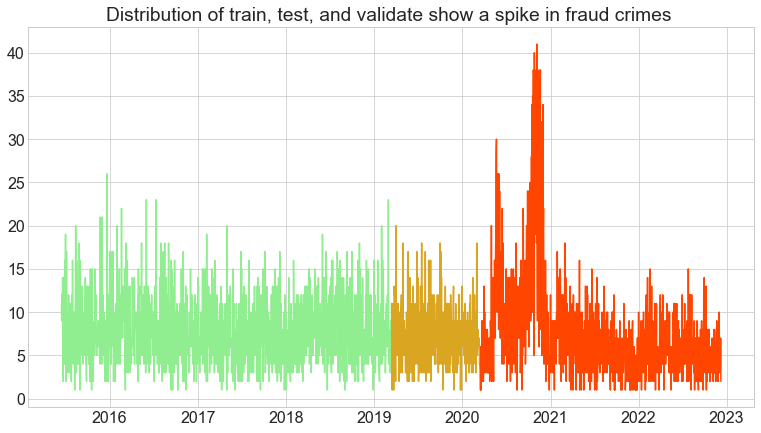

In [92]:
plt.title('Distribution of train, test, and validate show a spike in fraud crimes ')
plt.plot(train.index, train.count_of_crime, color='lightgreen')
plt.plot(validate.index, validate.count_of_crime, color='goldenrod')
plt.plot(test.index, test.count_of_crime, color='orangered')
plt.show()

#### This is taking all crime data by day

## Explore

In [93]:
train.head(2)

,count_of_crime
date,
2015-06-15,11
2015-06-16,9


array([[<AxesSubplot:title={'center':'count_of_crime'}>]], dtype=object)

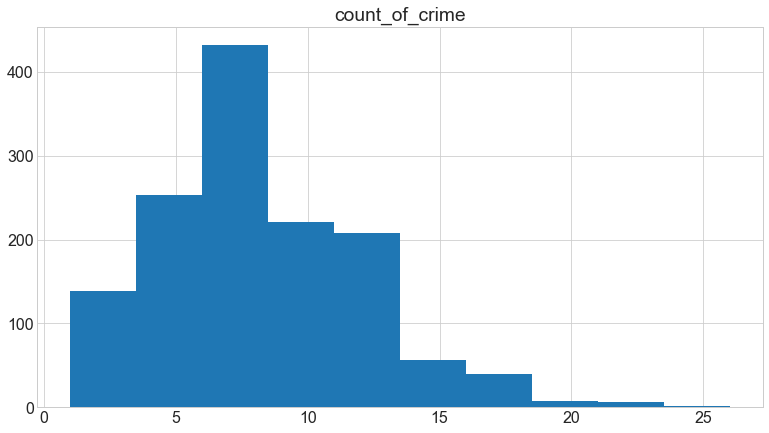

In [94]:
#Looks fairly normal
train.hist()

In [95]:
print(f'Mean of count of crime per day:{train.count_of_crime.mean()}')
print(f'Median of count of crime per day:{train.count_of_crime.median()}')
print(f'Mode of count of crime per day:{train.count_of_crime.mode()}')

Mean of count of crime per day:7.926632428466617
Median of count of crime per day:7.0
Mode of count of crime per day:0    7
Name: count_of_crime, dtype: int64


### 7 fraud crimes per day is the median and mode, should be a good baseline

<AxesSubplot:xlabel='date'>

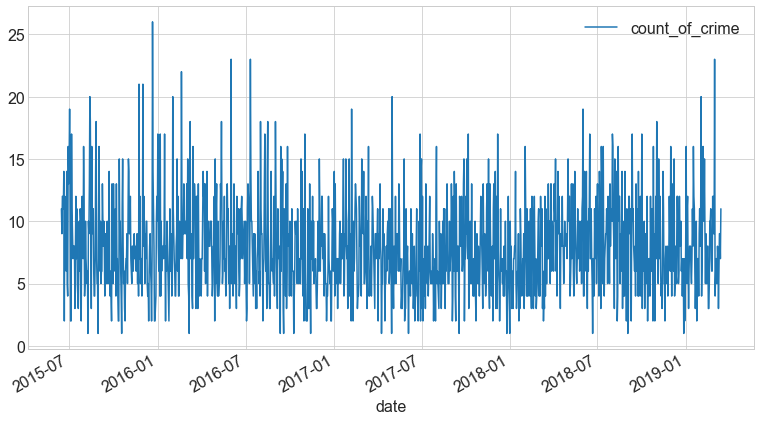

In [96]:
train.plot()

<AxesSubplot:title={'center':'Monthly Average'}, xlabel='date'>

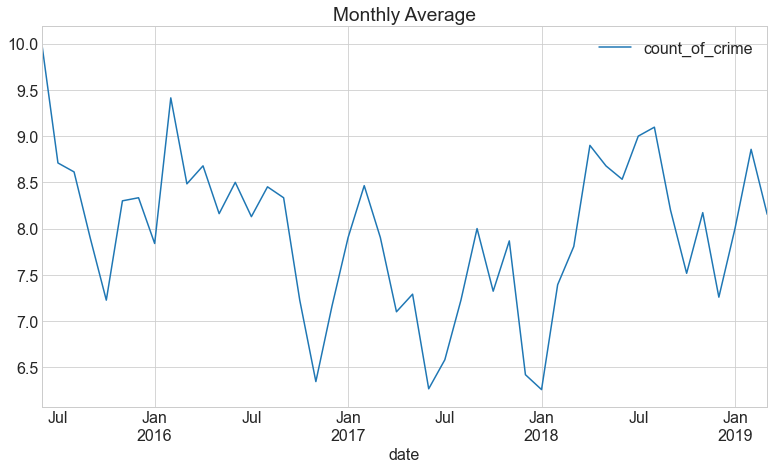

In [97]:
#Resample by month
train.resample('M').mean().plot(title='Monthly Average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='date'>

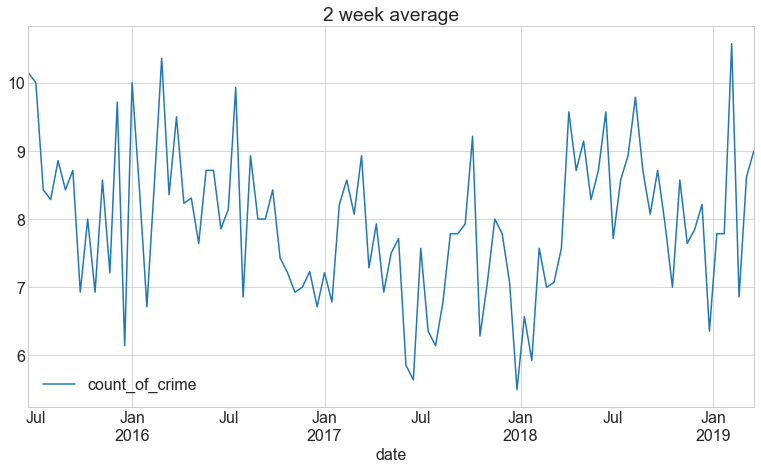

In [98]:
#Bi weekly average
train.resample('2W').mean().plot(title='2 week average')

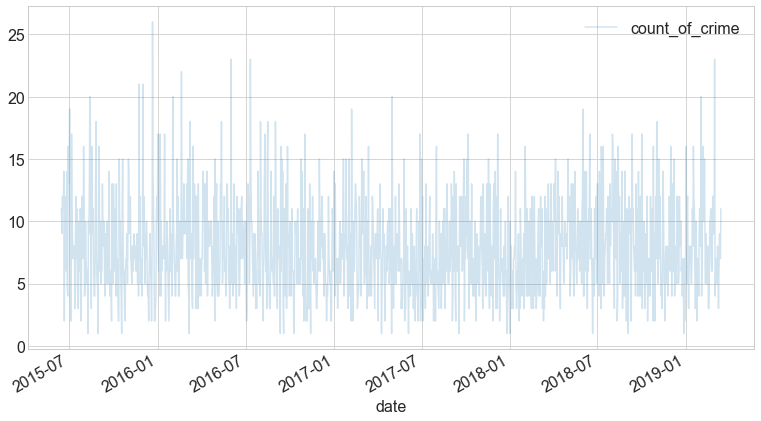

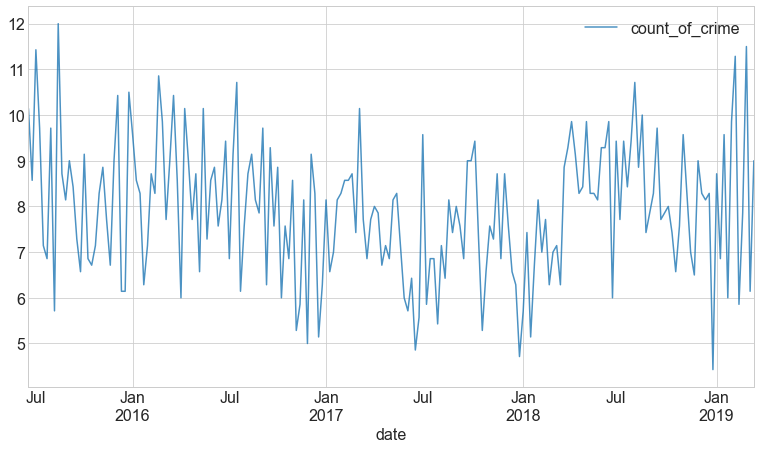

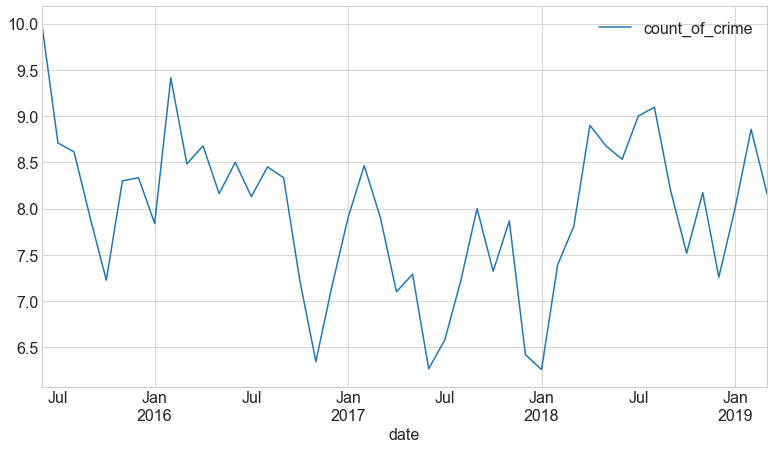

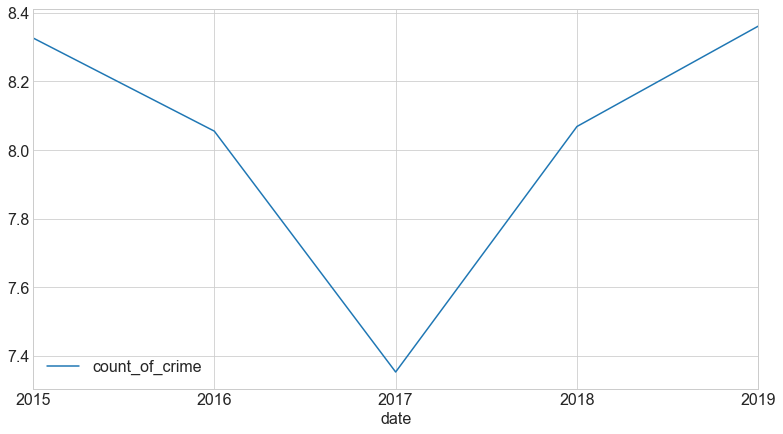

In [99]:
train.plot(alpha=.2, label='Daily')
train.resample('W').mean().plot(alpha=.8, label='Weekly')
train.resample('M').mean().plot(label='Montly')
train.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

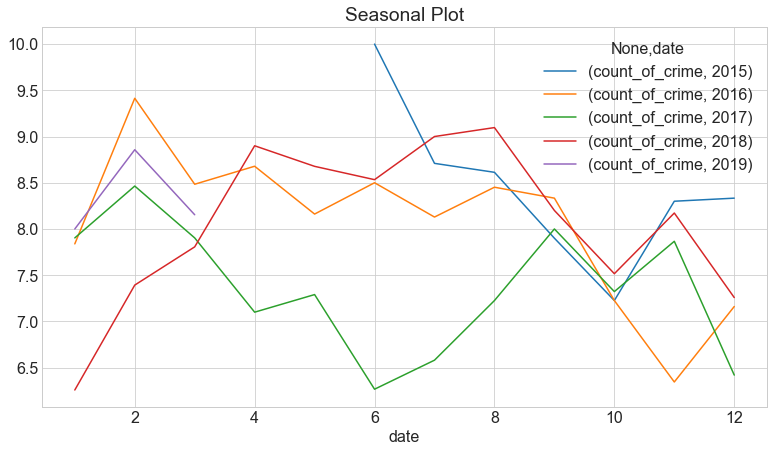

In [100]:
#Seasonal Plot?
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=182')

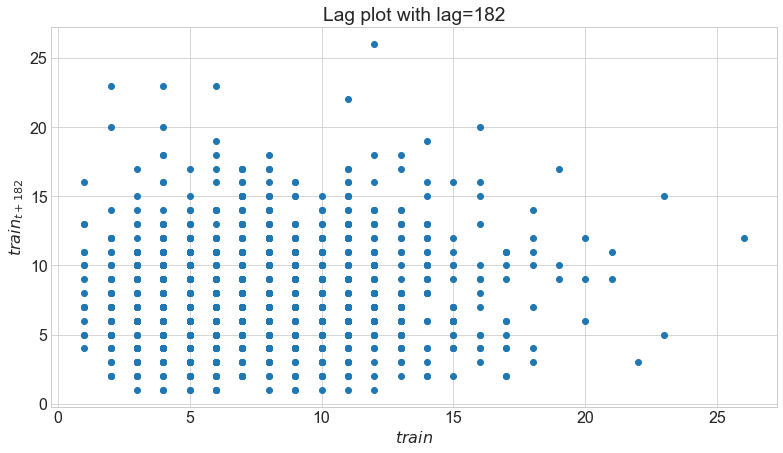

In [101]:
plt.scatter(train, train.shift(-182))
plt.xlabel('$train$')
plt.ylabel('$train_{t + 182}$')
plt.title('Lag plot with lag=182')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

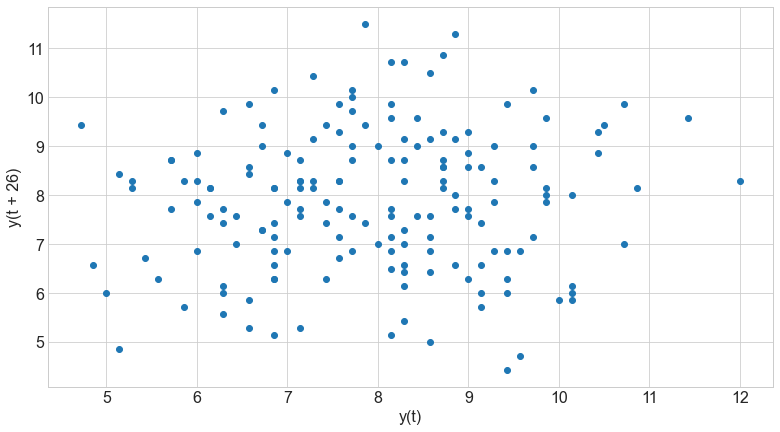

In [102]:
#Using Lag Plot
pd.plotting.lag_plot(train.count_of_crime.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

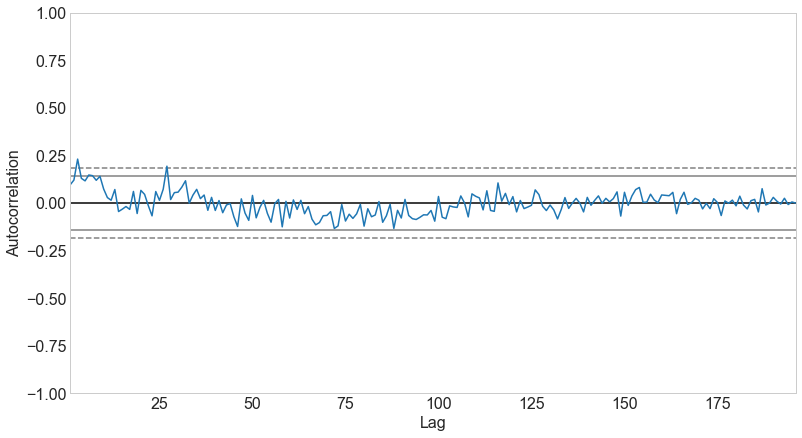

In [103]:
#Does not look significantly different
pd.plotting.autocorrelation_plot(train.count_of_crime.resample('W').mean())

In [104]:
#Seasonal Decomposition
y = train.count_of_crime.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
date,,,,
2015-06-21,10.142857,NaN,-0.295876,NaN
2015-06-28,8.571429,NaN,-0.914236,NaN
2015-07-05,11.428571,NaN,0.728392,NaN
2015-07-12,9.714286,NaN,-0.303202,NaN
2015-07-19,7.142857,NaN,1.129491,NaN


<AxesSubplot:xlabel='date'>

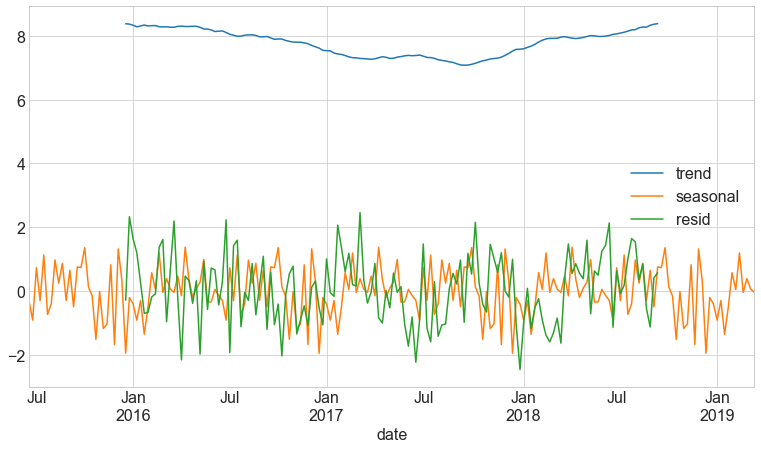

In [105]:
decomposition.iloc[:, 1:].plot()

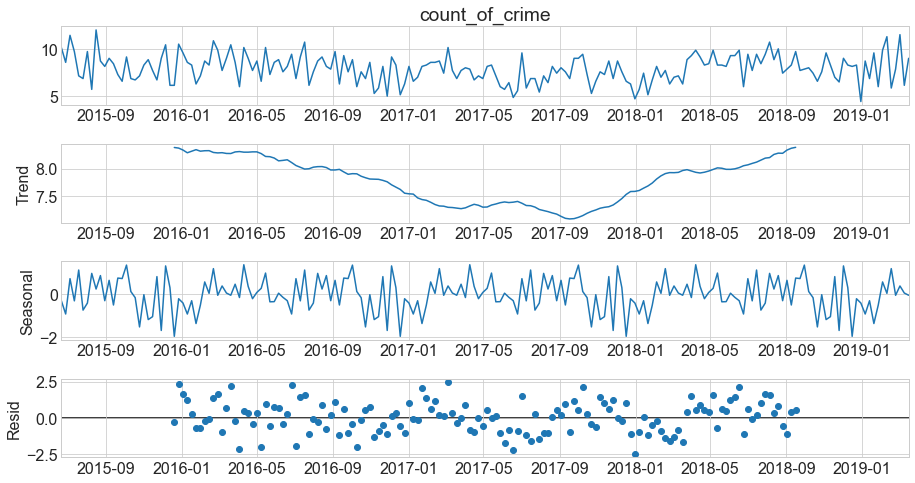

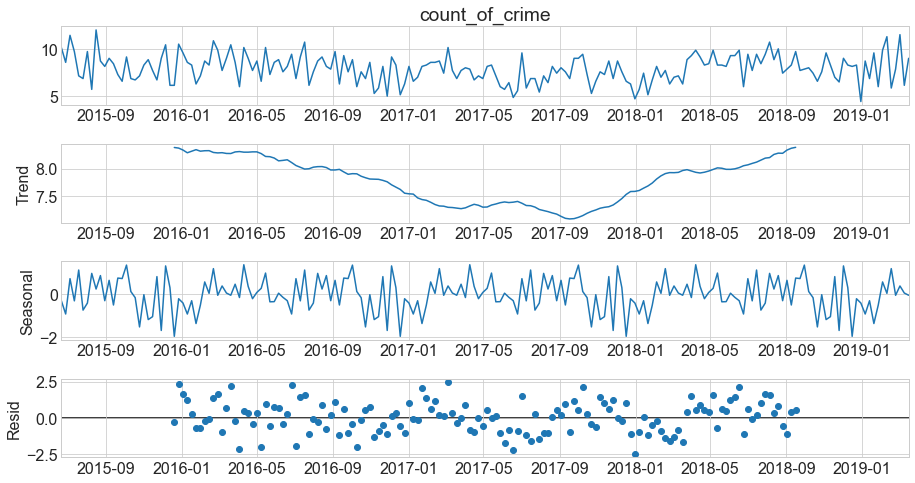

In [106]:
result.plot()

In [107]:
#Since Time Series data is sensitive to length of time in predictions, lets use 2 years of train, 
#1 year validate, 1 year test

### Redoing Train test split (2 years, 1 year, 1 year)

In [108]:
# ### Performing new train-test split
train = new_df.loc['2017-03-14':'2019-03-15']
validate = new_df.loc['2019-03-16':'2020-03-16']
test = new_df.loc['2020-03-16': '2021-03-15']

In [109]:
print(f'The length of train is:{len(train)}')
print(f'The length of validate is:{len(validate)}')
print(f'The length of test is:{len(test)}')

The length of train is:730
The length of validate is:364
The length of test is:364


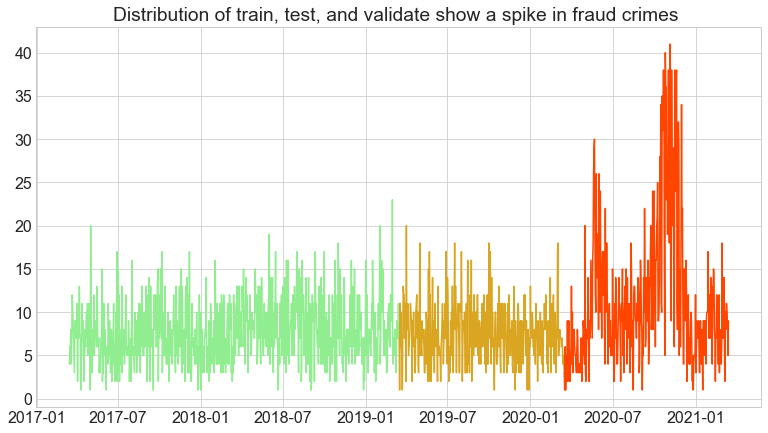

In [110]:
plt.title('Distribution of train, test, and validate show a spike in fraud crimes ')
plt.plot(train.index, train.count_of_crime, color='lightgreen')
plt.plot(validate.index, validate.count_of_crime, color='goldenrod')
plt.plot(test.index, test.count_of_crime, color='orangered')
plt.show()

# Modeling

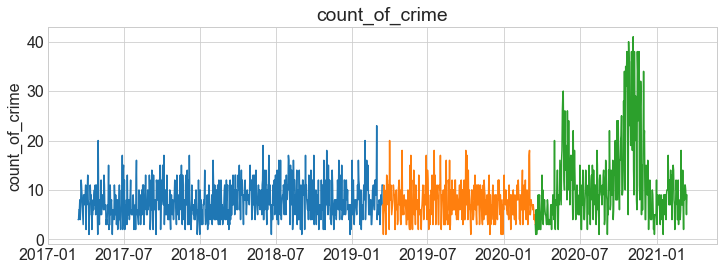

In [111]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [112]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [113]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

### # Create the empty dataframe

In [114]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

### Make Predictions: Last Observed Value

In [115]:
crime = train['count_of_crime'][-1:][0]
yhat_df = pd.DataFrame({'count_of_crime': [crime]}, 
                       index = validate.index)

yhat_df.head(2)

,count_of_crime
date,
2019-03-16,11
2019-03-17,11


### Plot actual vs predicted values

count_of_crime -- RMSE: 5


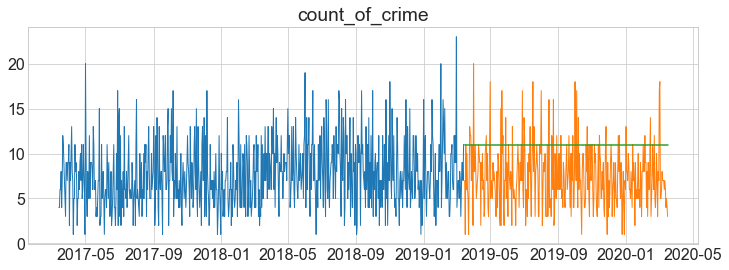

In [116]:
plot_and_eval('count_of_crime')

In [117]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = 'count_of_crime')

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [118]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0


## Simple Average

### Make Predictions

In [119]:
crime = round(train['count_of_crime'].mean(), 2)


yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)

yhat_df.head(3)

,count_of_crime
date,
2019-03-16,7.72
2019-03-17,7.72
2019-03-18,7.72


### Plot and Evaluate

count_of_crime -- RMSE: 3


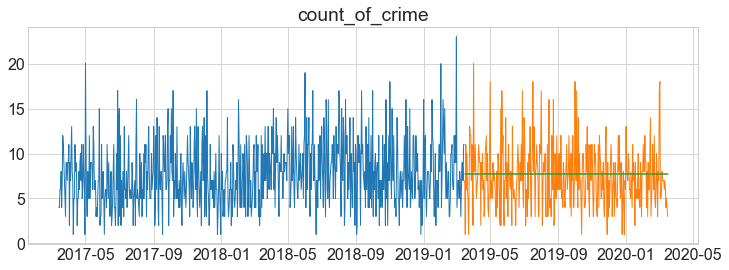

In [120]:
for col in train.columns:
    plot_and_eval('count_of_crime')

### Evaluate

In [121]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = 'count_of_crime')
eval_df

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0


## Moving Average

In [122]:
#Make Predictions

In [123]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

crime = round(train['count_of_crime'].rolling(period).mean().iloc[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)
yhat_df.head(2)

,count_of_crime
date,
2019-03-16,8.03
2019-03-17,8.03


### Plot Actual vs Predicted

count_of_crime -- RMSE: 4


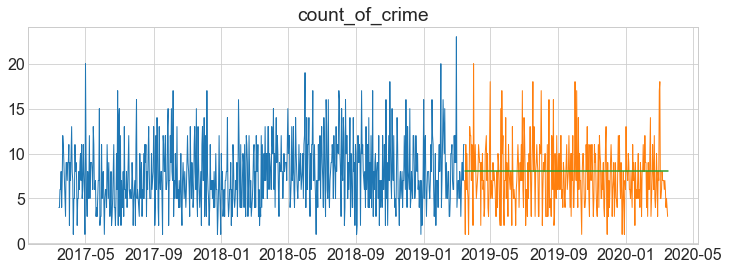

In [124]:
plot_and_eval('count_of_crime')

### Evaluate

In [125]:
for col in train.columns:
    eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = 'count_of_crime')
eval_df

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0


### Use more moving averages to predict

In [126]:
periods = [60, 90, 120]

for p in periods:
    crime = round(train['count_of_crime'].rolling(p).mean().iloc[-1], 2)

    yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = validate.index)

    model_type = str(p) + 'd moving average'
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'count_of_crime'
                            )

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)
/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [127]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0


## Which is best so far?

In [128]:
# get the min rmse for each variable

min_rmse_dollars_sold = eval_df.groupby('target_var')['rmse'].min()[0]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_dollars_sold))]


,model_type,target_var,rmse
1,simple_average,count_of_crime,3.0


### Holt's Linear Trend

#### Basic Holt's Linear Trend

**Make Predictions**

Now, like we would when using sklearn, we will create the Holt object, fit the model, and make predictions. 

Holt: 

- exponential = True/False (exponential vs. linear growth, additive vs. multiplicative)
- damped $\phi$ = True/False: with Holt, forecasts will increase or decrease indefinitely into the future.  To avoid this, use the Damped trend method which has a damping parameter 0< ϕ <1. 


fit: 

- smoothing_level ($\alpha$): value between (0,1)
    - Closer to 0, the level doesn't change with each new observation
    - Closer to 1, the level reacts strongly with each new observation
- smoothing_slope ($\beta$): value between (0,1)
    - Closer to 0, trend is not changing over time
    - Closer to 1, trend is changing significantly over time
- optimized: use the auto-optimization that allow statsmodels to automatically find an optimized value for us. 

In [129]:
train.columns

Index(['count_of_crime'], dtype='object')

In [130]:
# Create and fit our Holt's Object
model = Holt(train['count_of_crime'], exponential = False, damped=True)
model = model.fit(smoothing_level = .1, smoothing_trend = .1, optimized = True)

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/3163450469.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model = Holt(train['count_of_crime'], exponential = False, damped=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [131]:
validate.index[-1]

Timestamp('2020-03-16 00:00:00')

In [132]:
validate.shape

(364, 1)

In [133]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0


In [134]:
# Create the model object
model_holt = Holt(train['count_of_crime'], exponential=False, damped_trend=True).fit(optimized=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [135]:
model_holt

In [136]:
print(model_holt.summary())

                              Holt Model Results                              
Dep. Variable:         count_of_crime   No. Observations:                  730
Model:                           Holt   SSE                           9376.852
Optimized:                       True   AIC                           1873.657
Trend:                       Additive   BIC                           1896.622
Seasonal:                        None   AICC                          1873.812
Seasonal Periods:                None   Date:                 Tue, 13 Dec 2022
Box-Cox:                        False   Time:                         15:25:10
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0170879                alpha                 True
smoothing_trend            0.0170879                

In [137]:
# make predictions for each date in validate 
predictions_holt = model_holt.forecast(len(validate))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [138]:
predictions_holt.index=yhat_df.index

In [139]:
predictions_holt

date
2019-03-16    8.197046
2019-03-17    8.197598
2019-03-18    8.198040
2019-03-19    8.198394
2019-03-20    8.198676
                ...   
2020-03-12    8.199807
2020-03-13    8.199807
2020-03-14    8.199807
2020-03-15    8.199807
2020-03-16    8.199807
Length: 364, dtype: float64

In [140]:
# add predictions to yhat_df
yhat_df['count_of_crime'] = round(predictions_holt, 2)

In [141]:
yhat_df

,count_of_crime
date,
2019-03-16,8.2
2019-03-17,8.2
2019-03-18,8.2
2019-03-19,8.2
2019-03-20,8.2
...,...
2020-03-12,8.2
2020-03-13,8.2
2020-03-14,8.2


count_of_crime -- RMSE: 4


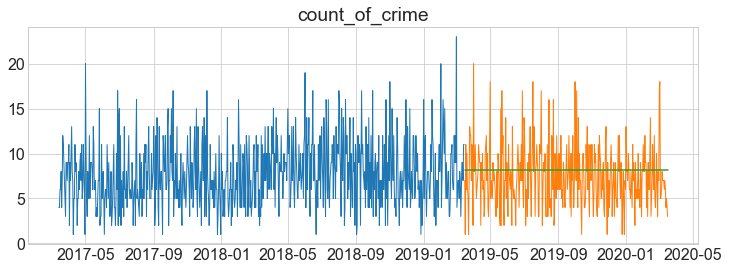

In [142]:
for col in train.columns:
    plot_and_eval(target_var = 'count_of_crime')

In [143]:
eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'count_of_crime')
eval_df

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


,model_type,target_var,rmse
0,last_observed_value,count_of_crime,5.0
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0
6,Holts,count_of_crime,4.0


### Holts Seasonal Trend

#### I went back and changed the length of train to be exactly 2 seasons (365*2) otherwise holts seasonal would not work

In [144]:
fit1 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add', seasonal='add', use_boxcox=True).fit()#(use_boxcox=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [145]:
fit2 = ExponentialSmoothing(train.count_of_crime, seasonal_periods=365, trend='add', seasonal='add', damped_trend=True,use_boxcox=True).fit()#(use_boxcox=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [146]:
#fit1.params, fit2.params

In [147]:
results_quantity=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])

In [148]:
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']

In [149]:
#Results for Holts Exponential Smoothing fit 1
results_quantity["Additive_Quantity"] = [fit1.params[p] for p in params] + [fit1.sse]

In [150]:
#Results for Holts Exponential Smoothing fit 2
results_quantity["Additive_Damp_Quantity"] = [fit2.params[p] for p in params] + [fit2.sse]

In [151]:
results_quantity

,Additive_Quantity,Additive_Damp_Quantity
$\alpha$,1.490116e-08,1.490242e-08
$\beta$,2.155964e-10,6.655386e-09
$\phi$,NaN,9.950000e-01
$\gamma$,0.000000e+00,5.257472e-10
$l_0$,2.922669e+00,2.569605e+00
$b_0$,1.391801e-03,5.904827e-03
SSE,4.527637e+03,4.552244e+03


#### Additive Quantity (Fit 1) Is best (See SSE) but thats not saying much!

In [152]:
yhat_df = fit1.forecast(validate.shape[0]).rename('count_of_crime').to_frame()
yhat_df

/opt/homebrew/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,count_of_crime
730,9.660756
731,5.646230
732,10.612668
733,7.388362
734,8.453207
...,...
1089,10.612783
1090,7.522272
1091,9.606561
1092,5.796665


In [153]:
#Evaluating for Holts seasonal
evaluate('count_of_crime')

5.0

In [154]:
#Adding it back to eval df
eval_df = append_eval_df('seasonal_holts_add', 'count_of_crime')

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [155]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0
6,Holts,count_of_crime,4.0
0,last_observed_value,count_of_crime,5.0
7,seasonal_holts_add,count_of_crime,5.0


### Predict Based on Previous Cycle

Take all the 2016 data points, compute the daily delta, year-over-year, average that delta over all the days, and adding that average to the previous year's value on a day will give you the forecast for that day. 

If a primary cycle is weekly, then you may want to do this on a week-over-week cadence. 

In the below example:  
1. Compute the 365 average year over year differences from 2013 through 2015
2. Add that average delta to the values during 2015. 
3. Set the index in your yhat dataframe to represent the dates those predictions are make for. 

Let's get started....

**Re-split data**

In [156]:
# ### Performing new train-test split
train = new_df.loc['2017-03-14':'2019-03-15']
validate = new_df.loc['2019-03-16':'2020-03-16']
test = new_df.loc['2020-03-16': '2021-03-15']

In [157]:
print(train.shape)
print(validate.shape)
print(test.shape)

train.head()

(730, 1)
(364, 1)
(364, 1)


,count_of_crime
date,
2017-03-14,4
2017-03-15,4
2017-03-16,6
2017-03-17,6
2017-03-18,8


In [158]:
train.tail()

,count_of_crime
date,
2019-03-11,9
2019-03-12,9
2019-03-13,7
2019-03-14,11
2019-03-15,11


### Make Predictions

In [159]:
train.diff(365) #.mean() is the average of those changes
# Remember .diff uses values one year back
#.mean() takes average of columns

,count_of_crime
date,
2017-03-14,NaN
2017-03-15,NaN
2017-03-16,NaN
2017-03-17,NaN
2017-03-18,NaN
...,...
2019-03-11,6.0
2019-03-12,3.0
2019-03-13,5.0


In [160]:
# finding the year-over-year difference for each day from 2017 to 2019 (train)
# taking the mean, and then adding that value to the daily values. 

yhat_df = train.loc['2018-03-15':'2019-03-15'] + train.diff(365).mean() #Adds that average
#These are predictions for 2016, index is incorrect (see above)

In [161]:
#We looked 365 days later, and created a series made up of all those differences

In [162]:
#Checking shapes to match
yhat_df.shape

(364, 1)

In [163]:
validate.shape

(364, 1)

In [164]:
train.diff(365).mean() 
# You take any point and look one year prior, this is mean difference from one year out to one year back

count_of_crime    1.353425
dtype: float64

### Back to predictions

In [165]:
train.loc['2018-03-15':'2019-03-15'].head()  #this is the REAL data

,count_of_crime
date,
2018-03-15,4
2018-03-16,11
2018-03-17,5
2018-03-18,5
2018-03-19,10


In [166]:
#Predictions
yhat_df.head() #4 is true value, 1.35 is prediction, then we add them (see 2018-03-15 value)

,count_of_crime
date,
2018-03-15,5.353425
2018-03-16,12.353425
2018-03-17,6.353425
2018-03-18,6.353425
2018-03-19,11.353425


In [167]:
# # let's peek into the prediction we will make by comparing the predicted value 
# # (train values + year-over-year average difference) to the actual train value
pd.concat([yhat_df.head(1), validate.head(1)])

,count_of_crime
date,
2018-03-15,5.353425
2019-03-16,7.000000


In [168]:
# set yhat_df to index of validate
yhat_df.index = validate.index

In [169]:
yhat_df.head() #Now this is the predictions for validate

,count_of_crime
date,
2019-03-16,5.353425
2019-03-17,12.353425
2019-03-18,6.353425
2019-03-19,6.353425
2019-03-20,11.353425


count_of_crime -- RMSE: 6


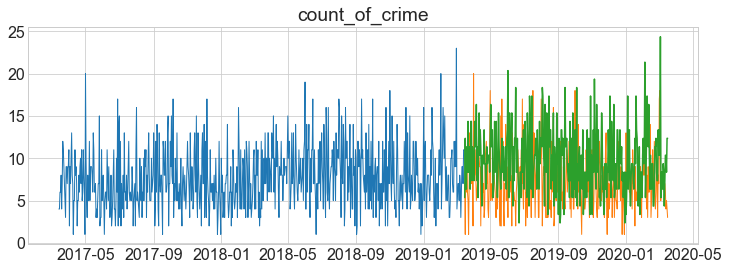

/var/folders/vw/1h05rsrx3wbc05jyk4c2bl680000gn/T/ipykernel_14556/1201099227.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return eval_df.append(d, ignore_index = True)


In [170]:
plot_and_eval(target_var = 'count_of_crime')
eval_df = append_eval_df(model_type = "previous_year", 
                            target_var = 'count_of_crime')

In [171]:
eval_df.sort_values(by='rmse')

,model_type,target_var,rmse
1,simple_average,count_of_crime,3.0
2,30d moving average,count_of_crime,4.0
3,60d moving average,count_of_crime,4.0
4,90d moving average,count_of_crime,4.0
5,120d moving average,count_of_crime,4.0
6,Holts,count_of_crime,4.0
0,last_observed_value,count_of_crime,5.0
7,seasonal_holts_add,count_of_crime,5.0
8,previous_year,count_of_crime,6.0


### Running model on test

#### Simple Average (Baseline) is the best predictor of fraud crimes, with an RMSE score of 3, we will evaluate this on test

In [172]:
crime = round(train['count_of_crime'].mean(), 2)


yhat_df = pd.DataFrame({'count_of_crime': [crime]}, index = test.index)

yhat_df.head(3)

,count_of_crime
date,
2020-03-16,7.72
2020-03-17,7.72
2020-03-18,7.72


In [173]:
# evaluation function for test
def evaluate_test(target_var):
    rmse = round(sqrt(mean_squared_error(test[target_var], yhat_df[target_var])), 0)
    return rmse

In [174]:
evaluate_test('count_of_crime')

9.0

### Extremely large RMSE (9) not surprising!

In [175]:
# plot and evaluate 
def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title('Simple Average Model Performance on Test')
    rmse = evaluate_test(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

count_of_crime -- RMSE: 9


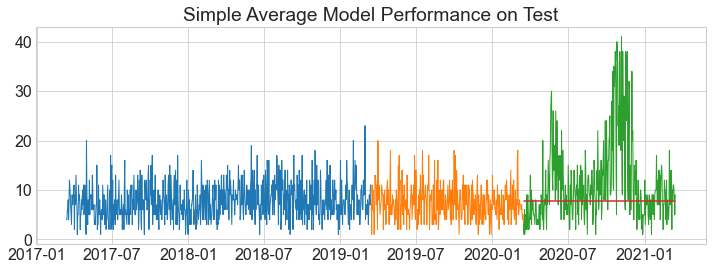

In [177]:
plot_and_eval_test('count_of_crime')

## Modeling Summary